<a href="https://colab.research.google.com/github/tata-lalitha/project/blob/main/Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
!pip install ipython-autotime
%load_ext autotime

time: 190 µs (started: 2021-05-21 08:25:13 +00:00)


In [76]:
#preprocessing 
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/drive/MyDrive/minni project '
CATEGORIES = ['dinning table','marigold','polar bear']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category) # Label Encoding the values
  path = os.path.join(DATADIR,category) # Create path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3)) # Normalizes the value from 0 to 1
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


time: 8.75 s (started: 2021-05-21 08:25:13 +00:00)


<BarContainer object of 3 artists>

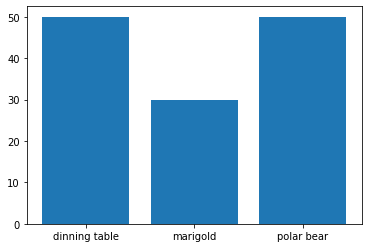

time: 160 ms (started: 2021-05-21 08:25:22 +00:00)


In [77]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [78]:
#split data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

time: 43.3 ms (started: 2021-05-21 08:25:22 +00:00)


In [79]:
#performing gridsearchcv, svm algorithm
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[{'C':[1,10,100,1000],'kernel':['linear']},{'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 3min 41s (started: 2021-05-21 08:25:22 +00:00)


In [80]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

time: 3.5 ms (started: 2021-05-21 08:29:04 +00:00)


In [81]:
y_pred=clf.predict(x_test)
y_pred_train=clf.predict(x_train)
from sklearn.metrics import accuracy_score,confusion_matrix
print('Test accuracy in SVM',accuracy_score(y_pred,y_test))
print('Train accuracy in SVM',accuracy_score(y_pred_train,y_train))
print('confusion matrix in SVM',confusion_matrix(y_pred,y_test))

Test accuracy in SVM 0.9743589743589743
Train accuracy in SVM 1.0
confusion matrix in SVM [[11  0  0]
 [ 0 10  0]
 [ 1  0 17]]
time: 843 ms (started: 2021-05-21 08:29:04 +00:00)


In [82]:
#saving model using pickle
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 86.4 ms (started: 2021-05-21 08:29:05 +00:00)


In [83]:
model=pickle.load(open('img_model.p','rb'))

time: 30.8 ms (started: 2021-05-21 08:29:05 +00:00)


Enter your URLhttps://cms.bbcearth.com//sites/default/files/2020-12/2fuxh0000001000.jpg
(1241, 3448, 3)
 PREDICTED OUTPUT: polar bear


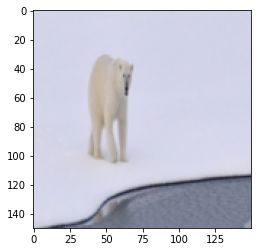

time: 3.74 s (started: 2021-05-21 09:01:13 +00:00)


In [96]:
#testing
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = clf.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

In [85]:
#accuracy of XGBoost algorithm without hyperparameter tunning
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
model = XGBClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred_train=model.predict(x_train)
print('Test accuracy in XGBoost',accuracy_score(y_pred,y_test))
print('Train accuracy in XGBoost',accuracy_score(y_pred_train,y_train))
print('confusion matrix in XGBoost',confusion_matrix(y_pred,y_test))

Test accuracy in XGBoost 0.7435897435897436
Train accuracy in XGBoost 1.0
confusion matrix in XGBoost [[ 8  1  4]
 [ 0  9  1]
 [ 4  0 12]]
time: 1min 11s (started: 2021-05-21 08:29:05 +00:00)


In [86]:
#performing randomsearchcv
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import GridSearchCV
#from sklearn import svm
params={'learning_rate':[0.001,0.01,0.1,0.25,0.4,0.5],
            'max_depth':[1,2,3,4,5,6],
            'max_features':[1,2,3,4,5,6],
            'n_estimators':[20,40,50,70,100]}
#svc=svm.SVC(probability=True)
clf=RandomizedSearchCV(model,params,cv=5,n_jobs=-1,verbose=0)
clf.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='multi:softprob',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sca...weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='depreca

time: 22min 34s (started: 2021-05-21 08:30:16 +00:00)


In [94]:
clf.best_params_

{'learning_rate': 0.25, 'max_depth': 5, 'max_features': 1, 'n_estimators': 40}

time: 7.37 ms (started: 2021-05-21 08:59:37 +00:00)


In [93]:
#accuracy of XGBoost algorithm with hyperparameter tunning
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
model = XGBClassifier(n_estimators=100,learning_rate=0.4,max_features=1,max_depth=5,reg_lambda=1,reg_alpha=2,min_child_weight=1,gamma=1)
#model = XGBClassifier(n_estimators=40,learning_rate=0.25,max_features=1,max_depth=5,reg_lambda=1,reg_alpha=2,min_child_weight=1,gamma=1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred_train=model.predict(x_train)
print('Test accuracy in XGBoost',accuracy_score(y_pred,y_test))
print('Train accuracy in XGBoost',accuracy_score(y_pred_train,y_train))
print('confusion matrix in XGBoost',confusion_matrix(y_pred,y_test))

Test accuracy in XGBoost 0.8461538461538461
Train accuracy in XGBoost 1.0
confusion matrix in XGBoost [[ 9  1  1]
 [ 0  9  1]
 [ 3  0 15]]
time: 2min 6s (started: 2021-05-21 08:57:30 +00:00)


In [89]:
#saving model using pickle
import pickle
pickle.dump(model,open('img_model.p','wb'))

time: 21.1 ms (started: 2021-05-21 08:54:57 +00:00)


In [90]:
model=pickle.load(open('img_model.p','rb'))

time: 21 ms (started: 2021-05-21 08:54:57 +00:00)


Enter your URLhttps://cms.bbcearth.com//sites/default/files/2020-12/2fuxh0000001000.jpg
(1241, 3448, 3)
 PREDICTED OUTPUT: polar bear


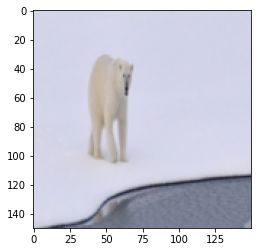

time: 8.89 s (started: 2021-05-21 09:00:50 +00:00)


In [95]:
#testing using XGBoost
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

From the above outputs we can see that the testing accuracy of SVM is **97.4%**(after hyperparameter tunning) and that of XGBoost is **84.6%**(after hyperparameter tunning).Hence, we can conclude that **SVM is a better alogirthm** from SVM and XGBoost for this particular dataset. 